# HW6
## 1

### 1 logistic

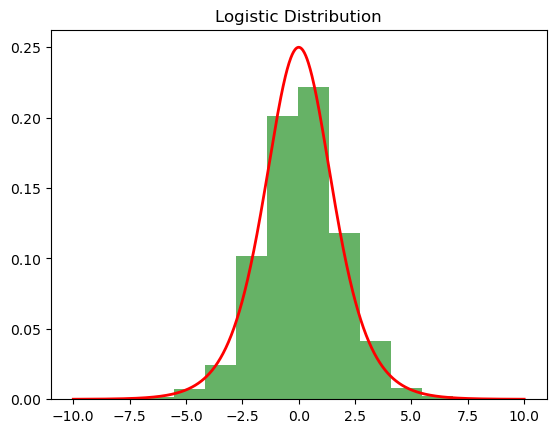

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def inverse_logistic1(y):
    return np.log(y / (1 - y))
y=np.random.rand(1000)
x=inverse_logistic1(y)
plt.hist(x, density=True, alpha=0.6, color='g')
x_pdf = np.linspace(-10, 10, 1000)#从-10到10生成1000个
pdf = np.exp(x_pdf) / (1 + np.exp(x_pdf))**2
plt.plot(x_pdf, pdf, 'r', lw=2)
plt.title('Logistic Distribution')
plt.show()



### 2 Rayleigh

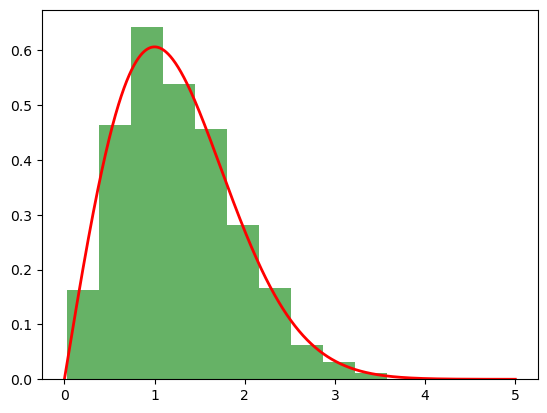

In [4]:
def inverse_rayleigh(y):
    return np.sqrt(-2*np.log(1-y))
y=np.random.rand(1000)
x=inverse_rayleigh(y)
plt.hist(x,density=True,alpha=0.6,color='g')
x_pdf = np.linspace(0, 5, 1000)
pdf = x_pdf * np.exp(-x_pdf**2 / 2)
plt.plot(x_pdf, pdf, 'r', lw=2)
plt.show()


### 3 Expo

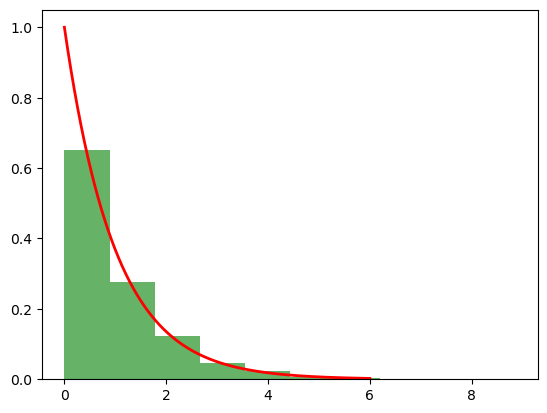

In [12]:
def inverse_expo(y):
    return -np.log(1-y)
y=np.random.rand(1000)
x=inverse_expo(y)
plt.hist(x,density=True,alpha=0.6,color='g')
x_pdf = np.linspace(0, 6, 1000)
pdf=np.exp(-x_pdf)
plt.plot(x_pdf, pdf, 'r', lw=2)
plt.show()

## 2

1. $$ Y \sim \text{Unif}(0,1) \quad g_Y(y) = 1 $$
   $$ c \ge \sup \frac{f(y)}{g(y)} = 210(x)^3(1-x)^5 \Rightarrow c \ge \frac{84375}{16777216} \quad \text{when } x = \frac{3}{8} $$
   $$ \frac{f(y)}{cg(y)} = \frac{210 \cdot 16777216 (x)^3(1-x)^5}{84375} $$

   

3. $$ U \sim \text{Unif}(0,1) $$

4. If $ U \le \frac{f(y)}{cg(y)} = \frac{210 \cdot 16777216 (x)^3(1-x)^5}{84375} $, set $ X = Y $, otherwise reject $ Y $, go back to step 1.

### a

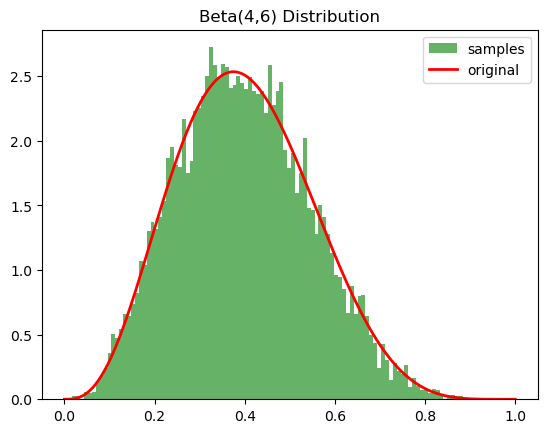

In [27]:
from scipy.stats import beta

def target_pdf(x):
    return beta.pdf(x, 4, 6)

# Find M
x_vals = np.linspace(0, 1, 1000)
M = np.max(target_pdf(x_vals))

samples = []
while len(samples) < 10000:
    u = np.random.rand()
    v = np.random.rand()
    if v <= target_pdf(u) / M:
        samples.append(u)

# Plot histogram
plt.hist(samples, bins=100, density=True, alpha=0.6, color='g',label='samples')
# Theoretical PDF
x_pdf = np.linspace(0, 1, 1000)
plt.plot(x_pdf, beta.pdf(x_pdf, 4, 6), 'r', lw=2,label='original')
plt.title('Beta(4,6) Distribution')
plt.legend()
plt.show()

### b

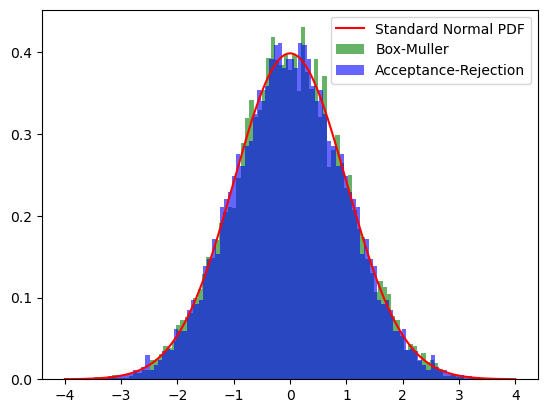

In [25]:
import numpy as np
import matplotlib.pyplot as plt
def box_muller(n):
    u = np.random.rand(n)
    v = np.random.rand(n)
    z1 = np.sqrt(-2 * np.log(u)) * np.cos(2 * np.pi * v)
    return z1

samples_box = box_muller(10000)


def g_c(x):
    return (np.sqrt(2*np.exp(1)/np.pi))*np.exp(-x)
def f(x):
    return (np.sqrt(2/np.pi))*np.exp(-1*(x**2)/2)
samples_ar = []
while len(samples_ar) < 10000:
    v = np.random.rand()
    x = np.random.exponential()
    if v <= f(x) / g_c(x):
        samples_ar.append(x)
        samples_ar.append(-x)

def standard_normal_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# 生成 x 轴的数据
x = np.linspace(-4, 4, 1000)

# 计算标准正态分布的 PDF
pdf = standard_normal_pdf(x)
plt.plot(x, pdf, color='r',label='Standard Normal PDF')
plt.hist(samples_box, bins=100, density=True, alpha=0.6, color='g', label='Box-Muller')
plt.hist(samples_ar, bins=100, density=True, alpha=0.6, color='b', label='Acceptance-Rejection')
plt.legend()

Box-Muller: Efficient, direct method for generating Normal samples,and can be more accurate but requires generating two random variables.

Acceptance-Rejection: May be less efficient due to rejections, especially with poor proposal distributions.But it can be applied to different siatributions.

## 3


### (a)

According to Monte Carlo Integration.
$$ \int_{0}^1 \frac{4}{1+x^2}dx=\frac{1}{n}\sum{1}^n\frac{4}{1+X_i^2}$$
$$ X_1,\cdots,X_n$$ are samples from Unif(0,1)


### (b)

$$ X_1,\cdots,X_n$$ are samples from Unif(0,1)
$$ \frac{4}{n}\sum_{i=1}^n \sqrt{X_i+\sqrt{X_i+\sqrt{X_i+\sqrt{X_i}}}}$$

### c
$$ c=P(Y>8)=E(I_A(Y>8))$$
Choose $ g\sim{N(8,1)}$,$Y_1,Y_2,\cdots,Y_n\sim{g}$
$$ c=\frac{1}{n}\sum_{j=1}^n \frac{h(Y_i)f(Y_i)}{g(Y_i)}=\frac{1}{n}\sum_{j=1}^nI(Y_i>8)\frac{\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}y_i^2}}{\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(y_i-8)^2}}=\frac{1}{n}\sum_{j=1}^nI(Y_i>8)e^{-8y_i+32}$$
When $ n=100000,c=6.269622669267703*10^{-16}$

## 4

The Jacobian matrix geometrically represents the local linear approximation of the function f at point x.The Jacobian matrix can be seen as a linear transformation matrix that maps small changes in the input space to small changes in the output space.
The Jacobian determinant geometrically represents the local volume scaling factor of the function f at point x. Specifically:the Jacobian determinant det(J(x)) represents the scaling factor by which the function f transforms a small n-dimensional volume element at point x.


## 5


### (a)
$
E(X) = \int_0^\infty \frac{\lambda x^{\alpha}}{\Gamma(\alpha)}e^{-\lambda x} dx \\
= \frac{1}{\Gamma(\alpha)} \int_0^\infty \lambda x^{\alpha} e^{-\lambda x} dx \\
= \frac{1}{\lambda \Gamma(\alpha)} \int_0^\infty (\lambda x)^{\alpha} e^{-\lambda x} dx \\
= \frac{1}{\lambda} \cdot \frac{\Gamma(\alpha + 1)}{\Gamma(\alpha)} \\
= \frac{\alpha}{\lambda}
$

$
E(X^2) = \frac{\lambda^2}{\Gamma(\alpha)} \int_0^\infty x^{2\alpha} e^{-\lambda x} dx \\
= \frac{\Gamma(\alpha + 2)}{\lambda^2 \Gamma(\alpha)} = \frac{(\alpha+1) \alpha}{\lambda^2}
$

$
\text{Var} = E(X^2) - (E(X))^2 = \frac{(\alpha+1)\alpha}{\lambda^2} - \frac{\alpha^2}{\lambda^2} = \frac{\alpha}{\lambda^2}
$
### (b)
$
f_Y(y) = -\frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} y^2} \\
 Y = \pm \sqrt{Z}
$

$
\left| \frac{\partial y}{\partial z} \right| = 2\frac{1}{2 \sqrt{z}}= \frac{1}{\sqrt{z}}
$

$
f_Z(z) = f_Y(y) \left| \frac{\partial y}{\partial z} \right| = \frac{1}{\sqrt{2\pi}} \cdot z^{-\frac{1}{2}} e^{-\frac{1}{2}z}
$

$
\Gamma(\frac{1}{2}) = \int_0^\infty z^{\frac{1}{2}} \cdot e^{ -z} dz = \sqrt{\pi}
$

$
F(\frac{1}{2})=\frac{1}{\sqrt{2\pi}} \cdot z^{-\frac{1}{2}} e^{-\frac{1}{2}z}=f_Z(z)
$
$
Z=Y^2 \sim \text{Gamma}\left(\frac{1}{2}, \frac{1}{2}\right)\\
$
### (c)
$
V = \sum_{i=1}^{n-1} Y_i^2, \,\, Y^2_i \sim \text{Gamma}\left(\frac{1}{2}, \frac{1}{2}\right), \,\, Y^2_i \,\, \text{i.i.d},V
$

$
f_Z(z) = \int_0^\infty f_X(x) f_Y(z-x) dx
$

$
Z= X + Y $
$
X \sim \text{Gamma}(\alpha, \lambda) \\
Y \sim \text{Gamma}(\beta, \lambda)
$

$
f_Z(z) = \int_0^z \frac{\lambda^{\alpha}x^{\alpha-1} e^{-\lambda x}}{\Gamma(\alpha)} \cdot \frac{\lambda^{\beta}(z-x)^{\beta-1} e^{-\lambda(z-x)}}{\Gamma(\beta)} dx
$

$
= \frac{\lambda^{\alpha+\beta} e^{-\lambda z}}{\Gamma(\alpha)\Gamma(\beta)} \cdot \int_0^z x^{\alpha-1} (z-x)^{\beta-1} dx
$

$
= \frac{\lambda^{\alpha+\beta} e^{-\lambda z}z^{\alpha+\beta-1}}{\Gamma(\alpha+\beta) }
$

$
f_Z(z) = \left\{ \begin{array}{ll}
	\frac{\lambda^{\alpha+\beta} e^{-\lambda z}z^{\alpha+\beta-1}}{\Gamma(\alpha+\beta) }, & \text{if } z > 0 \\
	0, & \text{otherwise}
\end{array} \right.
$

$
V \sim \Gamma \left(\frac{n}{2}, \frac{1}{2}\right), \,\, f_V(v) = \frac{1}{\Gamma\left(\frac{n}{2}\right)}\left(\frac{1}{2}\right)^{\frac{n}{2}} V^{\frac{n}{2}-1} e^{-\frac{v}{2}}\\
$
Thus,$ X+Y\sim{Gamma(\alpha+\beta,\lambda)}$,$ V\sim{Gamma(\frac{n}{2},\frac{1}{2})}\\$
$
f_V(v) = \frac{1}{\Gamma\left(\frac{n}{2}\right)}\left(\frac{1}{2}\right)^{\frac{n}{2}} v^{\frac{n}{2}-1} e^{-\frac{v}{2}}
$

### (d)


   $W = \frac{V}{n}, \quad Z = \frac{Y}{\sqrt{W}}, \quad Y = \sqrt{W} \cdot Z$

   $f_W(w) \cdot f_V(v) \left| \frac{dv}{dw} \right| = n \cdot f_{V}(v) = n \cdot \frac{1}{\Gamma\left(\frac{n}{2}\right)} \left(\frac{1}{2}\right)^{n/2} (w n)^{n/2 - 1} e^{-w n/2} \cdot n$

   $= \frac{1}{\Gamma\left(\frac{n}{2}\right)} \left(\frac{n}{2}\right)^{n/2} w^{n/2 - 1} e^{-nw/2}$

   $W \sim \text{Gamma} \left(\frac{n}{2}, \frac{1}{2}\right)$

   $\frac{\partial (w, y)}{\partial (z, w)} = \begin{bmatrix} 0 & 1/\sqrt{w} \\ 1 & z/\sqrt{w} \end{bmatrix} = \sqrt{w}$

   $f_{ZW} (z,w) = f_W(w) \cdot f_Y(y) \cdot \sqrt{w}$

   $= \frac{1}{\sqrt{2\pi}\Gamma(\frac{n}{2})}e^{-\frac{1}{2}(z^2w)-\frac{n}{2}w}(\frac{n}{2})^{\frac{n}{2}}w^{\frac{n-1}{2}}$

   $f_Z(z) = \int_{0}^{\infty} \frac{1}{\sqrt{2\pi}\Gamma(\frac{n}{2})}e^{-\frac{1}{2}(z^2w)-\frac{n}{2}w}(\frac{n}{2})^{\frac{n}{2}}w^{\frac{n-1}{2}} dw=$

### (e)

   $\chi = \frac{V_1}{m}, \quad \chi \sim \text{Gamma} \left(\frac{m}{2}, \frac{m}{2}\right)$

   $Y = \frac{V_2}{n}, \quad Y \sim \text{Gamma} \left(\frac{n}{2}, \frac{n}{2}\right)$

   $W = \frac{\chi}{Y}, \quad X = W \cdot Y$

   $\frac{\partial (x, y)}{\partial (w, y)} = \begin{bmatrix} y & 0 \\ w \cdot y & 1 \end{bmatrix} = \lvert y \rvert$

   $f_{W, Y}(w, y) =  \frac{\left(\frac{m}{2}\right)^{m/2}}{\Gamma\left(\frac{m}{2}\right)} \cdot \frac{\left(\frac{n}{2}\right)^{n/2}}{\Gamma\left(\frac{n}{2}\right)} (wy)^{m/2 - 1} e^{-m/2 \cdot wy} \cdot y^{n/2 - 1} e^{-n/2 \cdot y} $

   $f_W(w)  =\int_{0}^{\infty}  \frac{\left(\frac{m}{2}\right)^{m/2}}{\Gamma\left(\frac{m}{2}\right)} \cdot \frac{\left(\frac{n}{2}\right)^{n/2}}{\Gamma\left(\frac{n}{2}\right)}(wy)^{m/2 - 1} e^{-m/2 \cdot wy} \cdot y^{n/2 - 1} e^{-n/2 \cdot y} \, dy$

